<a href="https://colab.research.google.com/github/sadhub10/SIC-2025-Aulas-Pa09-y-Pa10/blob/main/Clase%201%20-%20IA%20-%20Capitulo%206%20-%2010/11/2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🚀 Estructura de Clase: Aprendizaje No Supervisado**



## I. Introducción y Fundamentos

**Unidad 1: Algoritmo de Aprendizaje No Supervisado (10 min)**

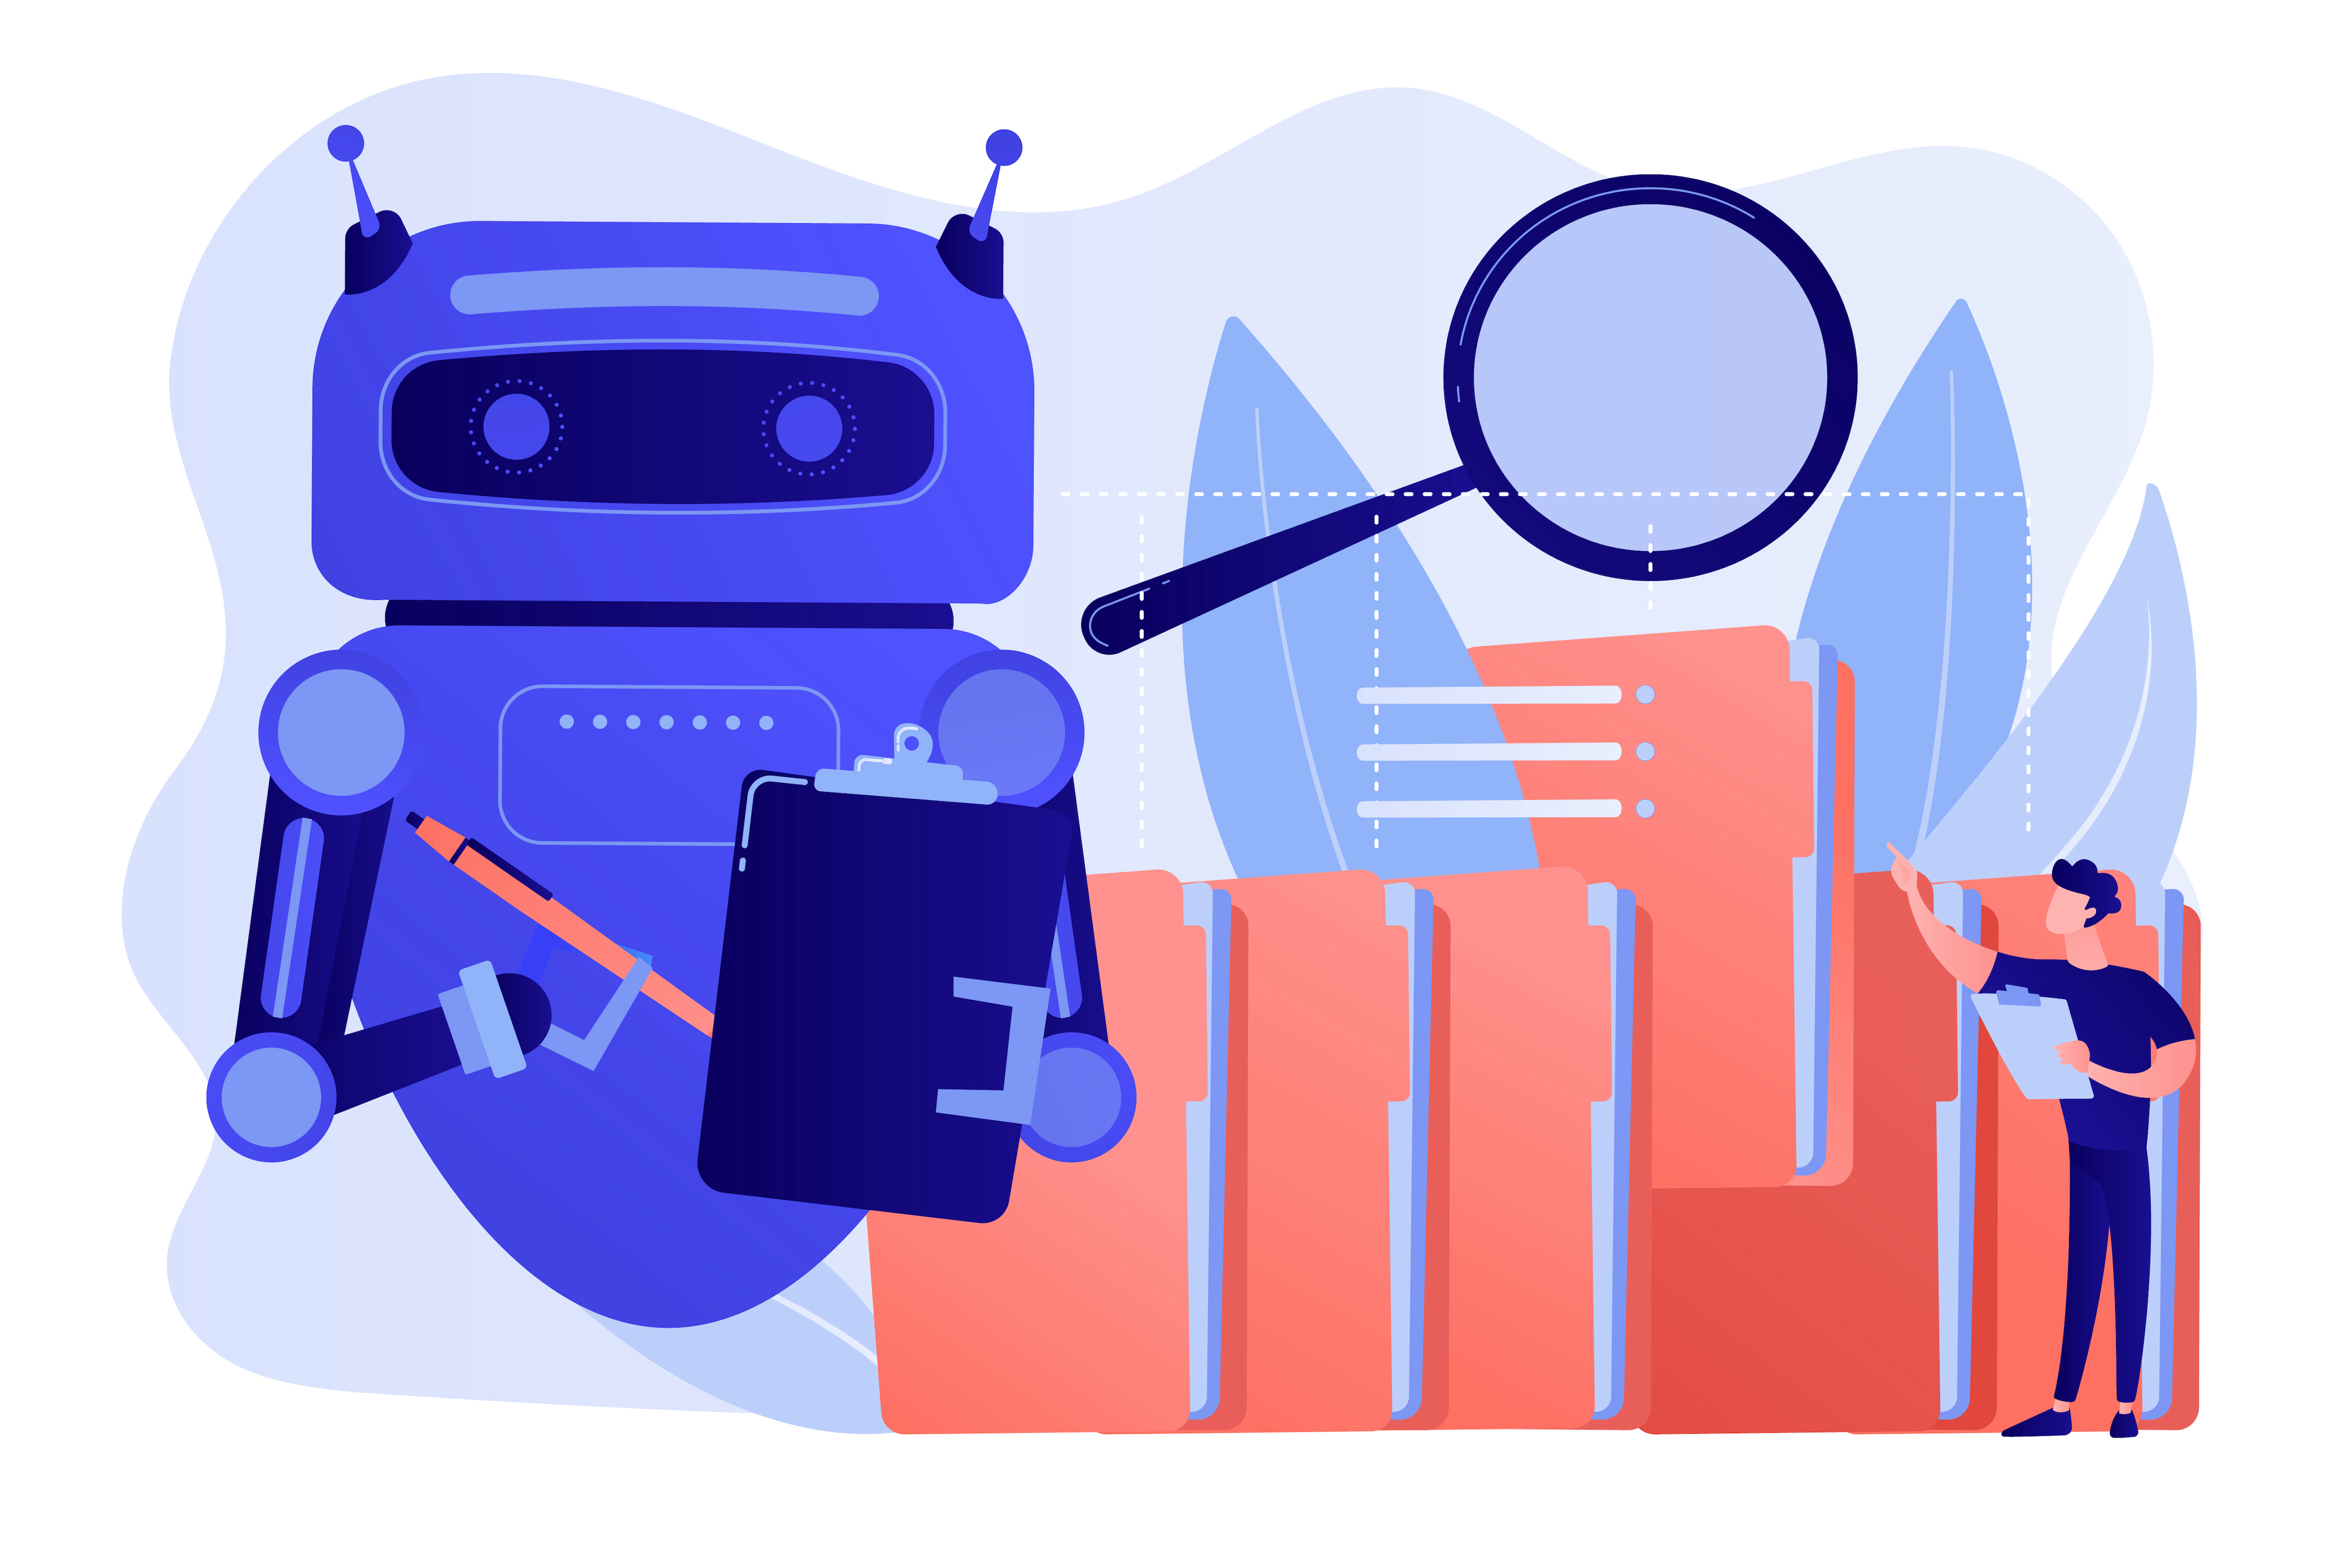

* Teoría y Conceptos: El Aprendizaje No Supervisado es una técnica de Machine Learning donde el conjunto de datos de entrada no tiene etiquetas de salida o una "variable objetivo" definida ( Y ). El objetivo principal es descubrir patrones, estructuras o conocimiento oculto dentro de los datos por sí mismos, a diferencia del aprendizaje supervisado, que predice una salida conocida.

* Analogía: Imagina que un explorador llega a una isla inexplorada. No tiene un mapa (sin etiquetas), pero comienza a agrupar las plantas por la forma de sus hojas o el tipo de suelo en el que crecen. Está descubriendo una estructura, no haciendo predicciones.

* Tareas Principales (Pase por encima):

Agrupamiento (Clustering): Dividir los datos en grupos ( clústeres ) calculando en la similitud. (Unidades 2 y 3).

Reducción de Dimensionalidad: Simplificar los datos reduciendo el número de variables. (Unidad 4).

**Unidad 2: Agrupación Jerárquico (20 min)**

* Concepto: El Clustering Jerárquico construye una jerarquía de clústeres, creando un "árbol" de agrupaciones.

1. El método más común es el Aglomerativo (Bottom-up) : Inicia con cada punto como un clúster individual y, en cada paso, fusiona los dos clústeres más cercanos hasta que solo queda uno.
2. El resultado se visualiza en un Dendrograma , donde la altura de la unión muestra la distancia entre los clústeres.

* Analogía: Piensa en el árbol de clasificación de especies biológicas (filogenia), donde las especies individuales se agrupan en géneros, luego en familias, y así sucesivamente.

🐍 Código de Agrupamiento Aglomerativo

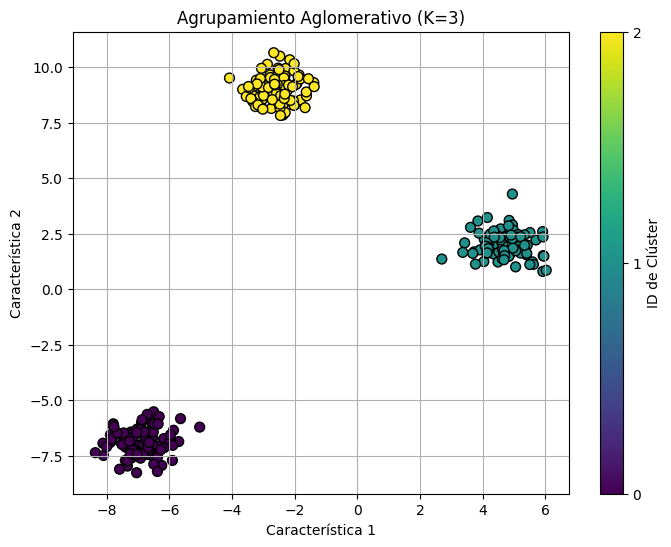

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# --- 1. Generar datos de ejemplo (3 "manchas" o blobs) ---
# X: Las coordenadas de los puntos
# y_true: Las etiquetas de clúster verdaderas (que no usaremos para el agrupamiento)
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=42)

# --- 2. Aplicar el Agrupamiento Aglomerativo ---
# n_clusters=3: Le decimos al algoritmo que queremos 3 grupos
# linkage='ward': Método de enlace (cómo se mide la distancia entre clústeres)
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Entrenar el modelo y obtener las etiquetas de clúster para cada punto
cluster_labels = agg_clustering.fit_predict(X)

# --- 3. Visualizar los resultados ---
plt.figure(figsize=(8, 6))

# Dibujar los puntos de datos, coloreados según el clúster asignado
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, edgecolor='k')

plt.title('Agrupamiento Aglomerativo (K=3)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.colorbar(scatter, label='ID de Clúster', ticks=[0, 1, 2])
plt.grid(True)
plt.show()

Datasets IRIS

Primeras 5 filas del DataFrame de Iris:


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

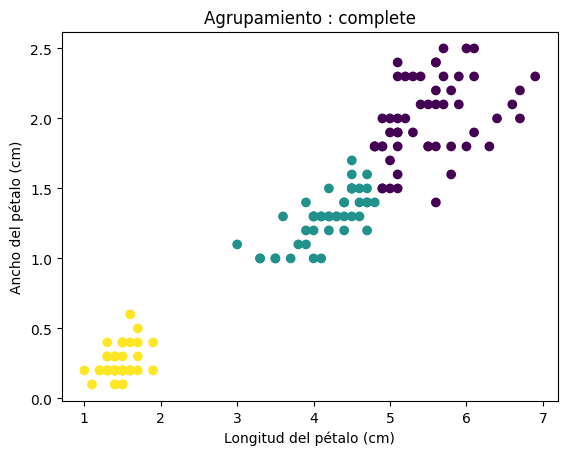

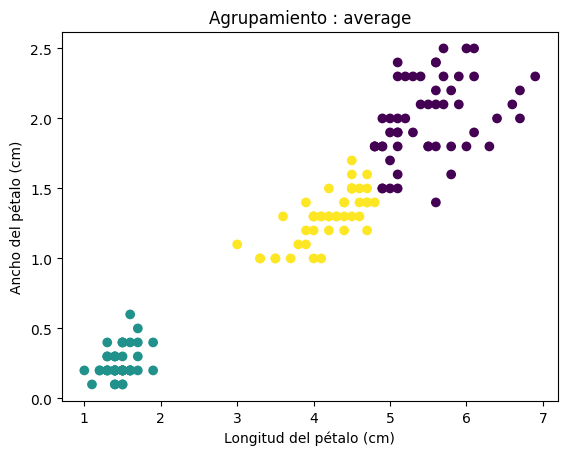

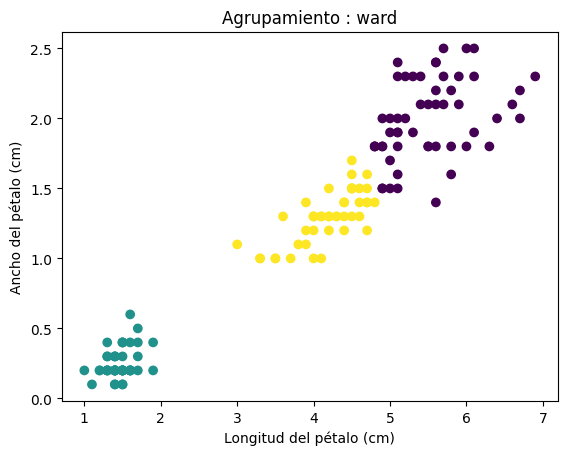

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
y = iris.target

# Visualizar Dataframe (Opcional, si quieres ver los datos en formato DataFrame)
iris_datapd = pd.DataFrame(iris.data, columns=iris.feature_names)
# Usar display y head() para una visualización más limpia del DataFrame
print("Primeras 5 filas del DataFrame de Iris:")
display(iris_datapd.head())

# Crear clustering jerarjico
from sklearn.cluster import AgglomerativeClustering

# Lista de métodos de enlace a probar
likage = ["complete", "average", "ward"]

for idx, i in enumerate(likage):
    plt.figure(idx)

    # Crear el modelo de Agrupamiento Aglomerativo con 3 clústeres
    # Corregido: Cambiado 'affinity' a 'metric'
    hier = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=i)

    # Ajustar el modelo a las columnas 2 y 3 (longitud y ancho del pétalo)
    hier.fit(iris_datapd.iloc[:, 2:4])

    # Graficar los resultados de los clústeres
    plt.scatter(
        iris_datapd.iloc[:, 2],
        iris_datapd.iloc[:, 3],
        c=hier.labels_
    )

    # Cambiar títulos y etiquetas a español
    plt.title("Agrupamiento : " + i)
    plt.xlabel('Longitud del pétalo (cm)')
    plt.ylabel('Ancho del pétalo (cm)')
    plt.show()

Código de ejemplo: Creando un Dendrograma

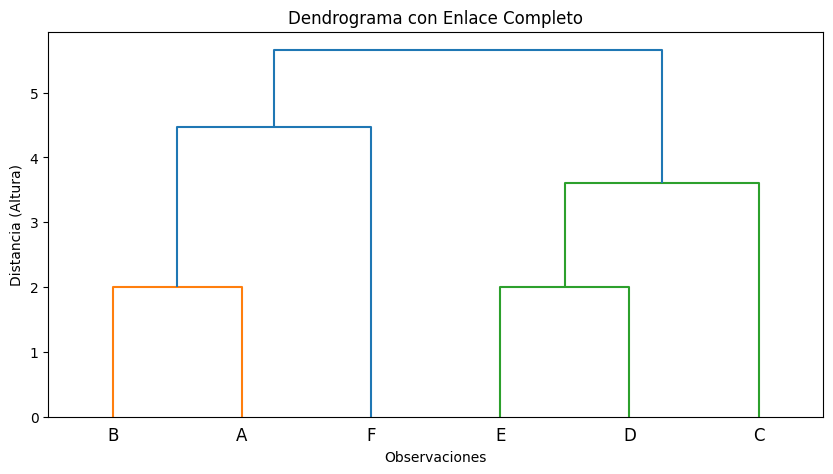

Clústeres resultantes (n=2): [0 0 1 1 1 0]


In [ ]:
# CÓDIGO 1: Clustering Jerárquico (Unidad 2 - Introducción)
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Datos de ejemplo (simulando 5 puntos en 2D)
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 0], [5, 4]])
etiquetas = ['A', 'B', 'C', 'D', 'E', 'F']

# 1. Calcular el enlace (usando 'ward' o 'complete')
# El método 'complete' (enlace completo) une los clústeres basándose en la distancia máxima entre sus puntos.
enlace = linkage(X, method='complete')

# 2. Generar el Dendrograma
plt.figure(figsize=(10, 5))
dendrogram(
    enlace,
    orientation='top',
    labels=etiquetas,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Dendrograma con Enlace Completo')
plt.xlabel('Observaciones')
plt.ylabel('Distancia (Altura)')
plt.show() # Mostrar el gráfico
# 3. (Opcional) Obtener clústeres cortando el dendrograma a una altura
# Por ejemplo, cortar a una distancia de 3.0
from sklearn.cluster import AgglomerativeClustering
modelo_agg = AgglomerativeClustering(n_clusters=2, linkage='complete')
clusters = modelo_agg.fit_predict(X)
print(f"Clústeres resultantes (n=2): {clusters}")

## II. Foco Principal: Agrupamiento No Jerárquico (45 min)

**Unidad 3: Agrupación No Jerárquico**

Este tipo de agrupamiento requiere que determinemos el número de clústeres (k) antes de ejecutar el algoritmo.

Tema 3.1: Agrupamiento de K-Means (30 min) 🧠

### 💡 Concepto Principal de K-Means
K-Means es el algoritmo de agrupamiento más popular. El objetivo principal de K-Means es encontrar$k$centros de cluster (centroides) que minimizan la suma de las distancias al cuadrado entre cada punto de dato y el centroide del cluster al que ha sido asignado.

* Algoritmo Basado en Centroides: Es un algoritmo iterativo que parte de la idea de que cada clúster está representado por el valor medio de los puntos que contiene (su centroide).

* Aprendizaje No Supervisado: Significa que trabaja con datos no etiquetados , es decir, no se le dice al algoritmo de antemano a qué grupo pertenece cada punto.



### ⚙️ Funcionamiento Paso a Paso
El algoritmo K-Means opera mediante un proceso iterativo que converge en una solución estable (aunque puede ser un óptimo local):

* Elección de $k$: Se debe elegir de antemano el número de clústeres ($k$) que se desea formar. Métodos como el Método del Codo o el Coeficiente de Silueta ayudan a determinar el valor óptimo de $k$.

* Inicialización de Centroides: Se eligen $k$ puntos iniciales como centroides. Esta elección puede ser aleatoria o mediante métodos más preferidos como K-Means++ , que mejora la precisión inicial.

* Asignación de Puntos: Cada punto de dato se asigna al centroide más cercano (generalmente usando la distancia euclidiana ).

* Actualización de Centroides: Los centroides se recalculan tomando la media (el valor medio) de todos los puntos que han sido asignados a ese clúster.

* Iteración y Convergencia: Los pasos 3 y 4 se repiten hasta que se cumple un criterio de parada, como:

1. Los centroides ya no se mueven significativamente entre iteraciones.
2. Se alcanza un número máximo predefinido de iteraciones.

### ✅ Ventajas y ⚠️ Desventajas

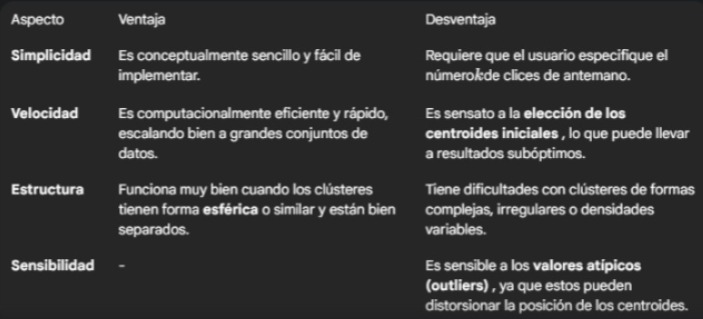

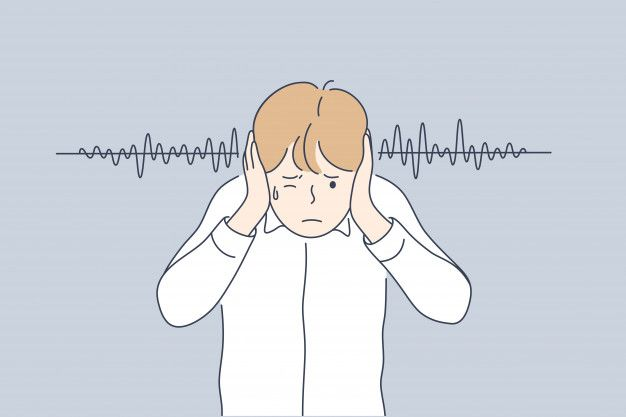

### 🎯 Aplicaciones Comunes

* Segmentación de Clientes: Agrupar clientes con comportamientos o características similares para campañas de marketing dirigidas.

* Compresión de imágenes: Reduzca el número de colores utilizados en una imagen agrupando tonos similares.

* Clasificación de Documentos: Agrupar documentos o artículos de texto que tratan temas similares.

### 📻 Analogía
Imagina que tienes k estaciones de radio (los centroides) y las personas (los datos) se sintonizan automáticamente a la estación más cercana a su ubicación. Luego, las estaciones se mueven al "centro de población" de sus oyentes. Este proceso se repite hasta que nadie necesita cambiar de estación.

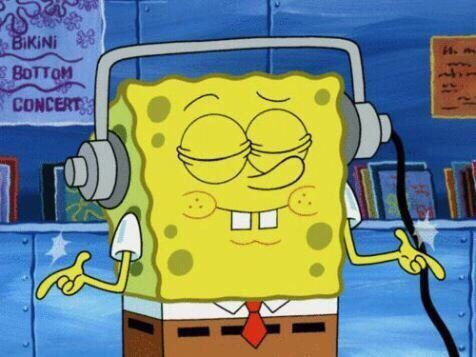

### 🐍 1. K-Means Básico con Scikit-learn

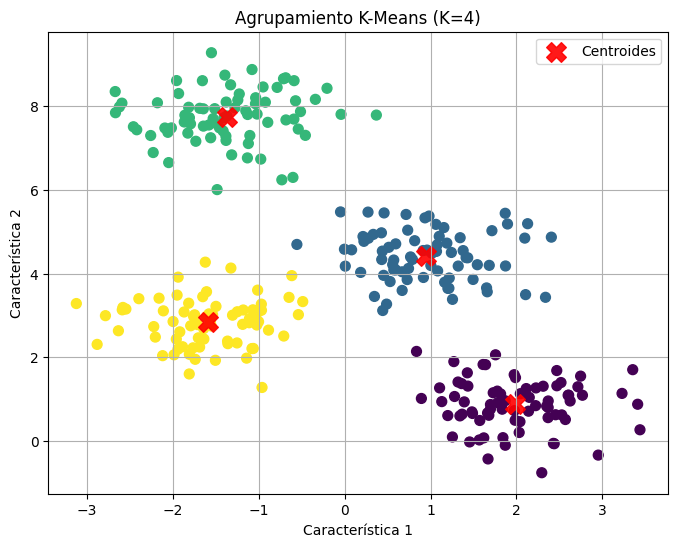

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# --- 1. Generar datos de ejemplo ---
# X contiene las coordenadas de 300 puntos.
# n_centers=4 significa que generamos 4 grupos bien definidos.
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# --- 2. Aplicar el algoritmo K-Means ---
# Definimos K=4 clústeres
k_value = 4
kmeans = KMeans(n_clusters=k_value, init='k-means++', n_init=10, random_state=42)

# Entrenar el modelo y asignar cada punto a un clúster
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# --- 3. Visualizar los resultados ---
plt.figure(figsize=(8, 6))

# Dibujar los puntos de datos, coloreados según su clúster asignado
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Dibujar los centroides (los centros de los clústeres)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Centroides')

plt.title(f'Agrupamiento K-Means (K={k_value})')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

### 🚶 2. Visualización del Movimiento de Centroides
K-Means es iterativo, y ver cómo se mueven los centroides ayuda a entender su funcionamiento. Este código muestra cómo puedes simular una sola iteración del algoritmo, viendo la asignación y la actualización.

/tmp/ipython-input-1281906863.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', k_value)


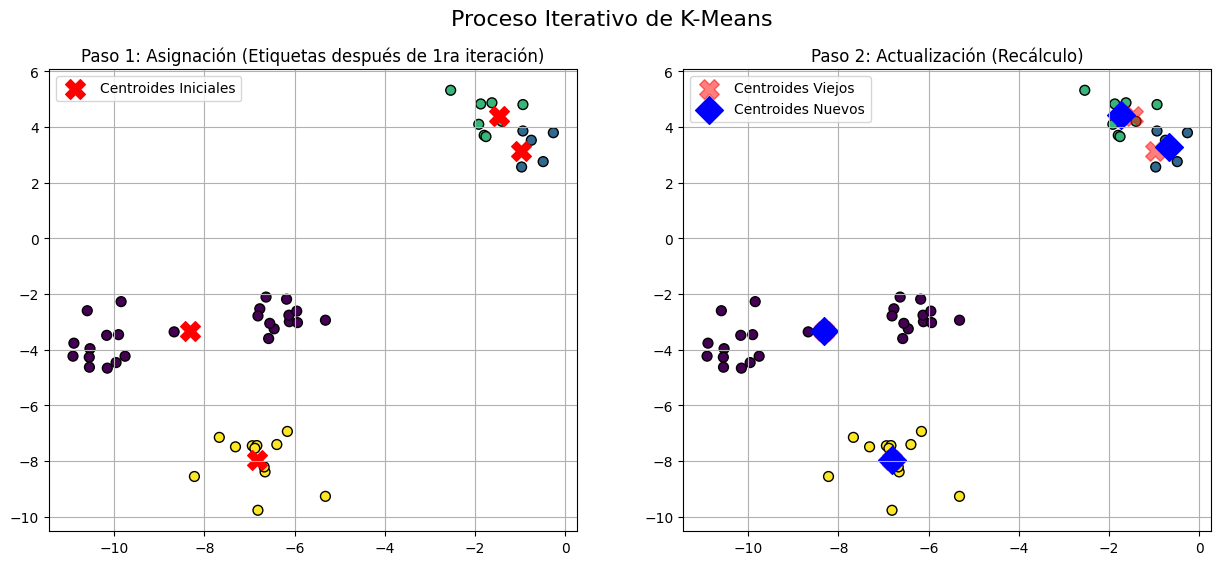

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# --- 1. Generar datos de ejemplo y centroides iniciales ---
X, _ = make_blobs(n_samples=50, centers=4, cluster_std=0.80, random_state=1)
k_value = 4

# Inicializar K-Means, pero solo correr 1 iteración
kmeans_single_iter = KMeans(n_clusters=k_value, init='random', n_init=1, max_iter=1, random_state=1)
kmeans_single_iter.fit(X)

# Obtener centroides iniciales y etiquetas después de la 1ra asignación
initial_centers = kmeans_single_iter.cluster_centers_
initial_labels = kmeans_single_iter.labels_

# --- 2. Recalcular centroides manualmente (Simular 2da iteración) ---
# Calcular la media de los puntos asignados a cada clúster
new_centers = np.array([X[initial_labels == i].mean(axis=0) for i in range(k_value)])

# --- 3. Visualización ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
colors = plt.cm.get_cmap('viridis', k_value)

# Subplot 1: Asignación inicial
ax1.scatter(X[:, 0], X[:, 1], c=initial_labels, s=50, cmap=colors, edgecolor='k')
ax1.scatter(initial_centers[:, 0], initial_centers[:, 1], c='red', s=200, marker='X', label='Centroides Iniciales')
ax1.set_title('Paso 1: Asignación (Etiquetas después de 1ra iteración)')
ax1.legend()
ax1.grid(True)

# Subplot 2: Actualización de Centroides
ax2.scatter(X[:, 0], X[:, 1], c=initial_labels, s=50, cmap=colors, edgecolor='k') # Mismos colores
ax2.scatter(initial_centers[:, 0], initial_centers[:, 1], c='red', s=200, marker='X', label='Centroides Viejos', alpha=0.5)
ax2.scatter(new_centers[:, 0], new_centers[:, 1], c='blue', s=200, marker='D', label='Centroides Nuevos')
ax2.set_title('Paso 2: Actualización (Recálculo)')
ax2.legend()
ax2.grid(True)

plt.suptitle('Proceso Iterativo de K-Means', fontsize=16)
plt.show()

### 📏 3. Método del Codo para Encontrar $K$ Óptimo

Uno de los desafíos de K-Means es elegir el número de clústeres ($K$). El Método del Codo es una técnica popular que examina la Inercia (la suma de las distancias cuadradas dentro del clúster).Se busca el punto en la gráfica donde la disminución de la inercia se vuelve marginal, formando una especie de "codo" .

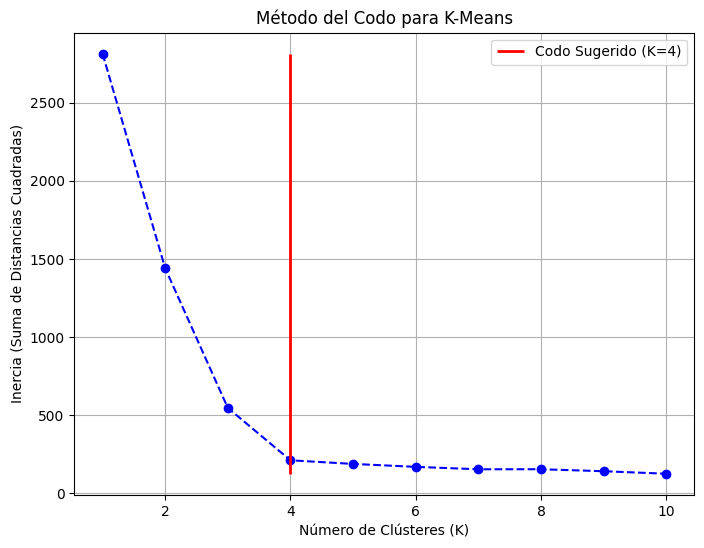


Valores de Inercia por K:
K=1: 2812.14
K=2: 1439.86
K=3: 546.89
K=4: 212.01
K=5: 188.83
K=6: 170.08
K=7: 154.64
K=8: 154.91
K=9: 142.18
K=10: 126.17


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# --- 1. Generar datos con una estructura conocida ---
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# --- 2. Calcular la Inercia para diferentes valores de K ---
inertia = [] # Lista para almacenar los valores de inercia
K_range = range(1, 11) # Probaremos K desde 1 hasta 10

for k in K_range:
    # Asegúrate de usar n_init='auto' o un número fijo para evitar warnings
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# --- 3. Visualizar el Método del Codo ---
plt.figure(figsize=(8, 6))

plt.plot(K_range, inertia, marker='o', linestyle='--', color='blue')

# El "codo" debe estar cerca de K=4, que es el número real de clústeres generados.
plt.vlines(4, min(inertia), max(inertia), color='red', linestyle='-', linewidth=2, label='Codo Sugerido (K=4)')

plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia (Suma de Distancias Cuadradas)')
plt.legend()
plt.grid(True)
plt.show()

print("\nValores de Inercia por K:")
for k, i in zip(K_range, inertia):
    print(f"K={k}: {i:.2f}")

## Método del Codo

El Método del Codo (Elbow Method) es una técnica heurística utilizada en el agrupamiento, particularmente en K-Means , para ayudar a determinar el número óptimo de clústeres ($K$) que deben formarse a partir de un conjunto de datos. 📐

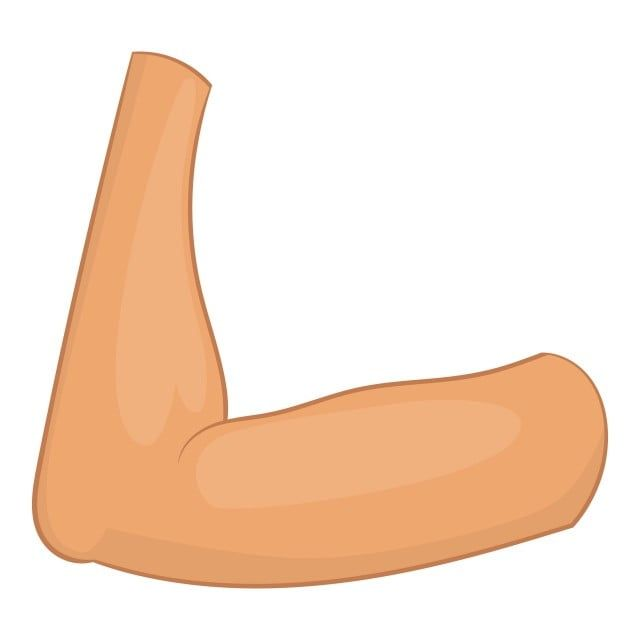

### 🧐 Concepto y Fundamento

El método se basa en el principio de que, a medida que aumenta el número de clústeres ($K$), la varianza o la suma de las distancias dentro de cada clúster (conocida como Inercia ) disminuirá.

* Inercia (Inertia): Es la suma de las distancias al cuadrado de cada punto al centroide de su clúster asignado.

* Objetivo: Queremos que la Inercia sea lo más pequeña posible, pero sin crear demasiados clústeres (lo que resultaría en sobreajuste).

### El Dilema de $K$
Si $K=1$, la Inercia será muy alta (todos los puntos están lejos de un único centroide).Si $K=N$(donde$N$es el número de puntos), la Inercia será cero (cada punto es su propio clúster), pero esto no es útil para la agrupación.El Método del Codo busca un equilibrio entre estos dos extremos.

### 📈 Funcionamiento y Detección del "Codo"

El procedimiento es el siguiente:

* Iteración: Ejecutas el algoritmo K-Means para un rango de valores de$K$(por ejemplo, desde 1 hasta 10).

* Meditación: Para cada valor de$K$, registra el valor de la inercia resultante.

* Visualización: Gráficas los valores de$K$en el eje X y los valores de Inercia en el eje Y.

* Detección: El gráfico resultante tendrá una forma que generalmente comienza con una caída muy pronunciada y luego se "dobla" o se "aplana" . Este punto de inflexión, donde la disminución marginal de la Inercia comienza a ser mucho menor , es el que se conoce como el "codo" .

El valor de $K$ en este punto del codo es el número óptimo sugerido, ya que agregar más clústeres después de ese punto proporciona un retorno decreciente en la mejora del agrupamiento.

### **Código de ejemplo:** K-Means y el Método del Codo  

Aquí exploraremos cómo elegir la $k$ óptimo (el número de grupos) mediante el Método del Codo , que busca el punto de inflexión en la métrica WCSS ( Within-Cluster Sum of Squares ).

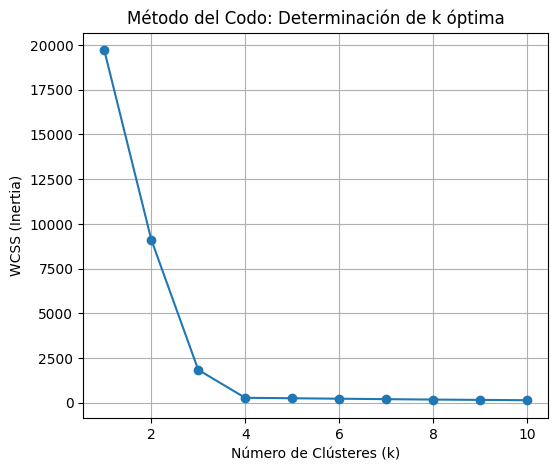

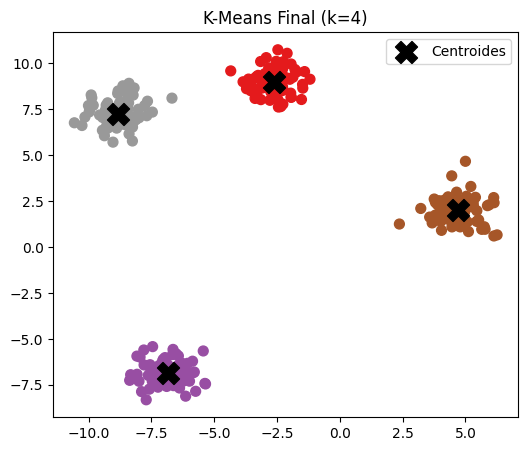

In [ ]:
# CÓDIGO 2: K-Means y Método del Codo (Unidad 3 - Detalle)
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 1. Generar datos (300 puntos, 4 centros reales)
X_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# 2. **Método del Codo (Para encontrar la 'k' óptima):**
wcss = [] # Suma total interna de cuadrados
rango_k = range(1, 11)

for k in rango_k:
    # n_init='auto' para evitar warning en sklearn
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_k.fit(X_blobs)
    wcss.append(kmeans_k.inertia_) # 'inertia_' es el WCSS

# Visualización del Método del Codo
plt.figure(figsize=(6, 5))
plt.plot(rango_k, wcss, marker='o')
plt.title('Método del Codo: Determinación de k óptima')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show() #

# 3. Implementar K-Means con el k óptimo (visualizando el "codo", que es k=4)
k_optimo = 4
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init='auto')
clusters_k4 = kmeans_final.fit_predict(X_blobs)

# 4. Visualización de los Clústeres
plt.figure(figsize=(6, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters_k4, s=50, cmap='Set1')
# Dibujar los centroides
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=250, c='black', marker='X', label='Centroides')
plt.title(f'K-Means Final (k={k_optimo})')
plt.legend()
plt.show()

Tema 3.2: Otros Métodos de Agrupación - DBSCAN (15 min) 🗺️

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de agrupamiento muy popular que contrasta con K-Means y el agrupamiento jerárquico porque se basa en la densidad de los puntos de datos, no en centroides o en la distancia entre todos los puntos. 🌌

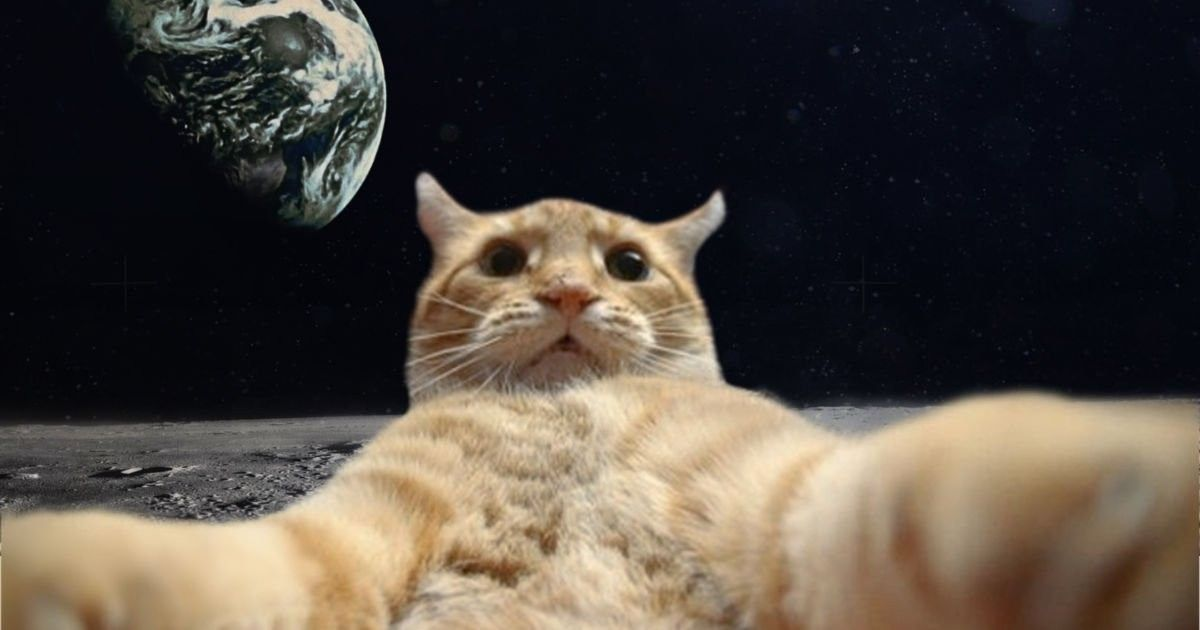

### 🔎 Concepto Principal
DBSCAN define clústeres como regiones contiguas de alta densidad, separadas por regiones de baja densidad. Su principal fortaleza es la capacidad de descubrir clústeres de forma arbitraria (no necesariamente esféricos) y la identificación automática de ruido (outliers).

Para que DBSCAN funcione, se requieren dos parámetros definidos por el usuario:

1. Épsilon ($\epsilon$o eps): La radio que define el vecindario alrededor de un punto dado. Si la distancia entre dos puntos es menor o igual a$\epsilon$, se consideran vecinos.

2. Mínimo de Puntos ( minPts): El número mínimo de puntos que deben estar dentro del vecindario de$\epsilon$para que ese vecindario sea considerado denso y forme un clúster.

### 🧬 Clasificación de Puntos
DBSCAN clasifica cada punto de datos en uno de tres tipos:

* Punto Central (Core Point): Un punto es central si tiene al menos minPtsvecinos (incluido él mismo) dentro de su radio$\epsilon$. Estos puntos forman el interior de un clúster.

* Punto de Borde: Un punto de frontera tiene menos de minPtsvecinos, pero cae dentro del vecindario.$\epsilon$de un Punto Central.

+ Punto de Ruido (Noise Point/Outlier): Un punto de ruido es aquel que no es un Punto Central y no es un Punto de Borde. Estos puntos se consideran ruido o valores atípicos.

### Analogía:

Imagina que estás viendo una galaxia. DBSCAN agrupa estrellas calculando en lo "densas" que están en ciertas regiones. Las estrellas muy agrupadas forman una galaxia (clúster), y las estrellas solitarias en el espacio vacío son el "ruido" (outliers).

### ✅ Ventajas y ⚠️ Desventajas

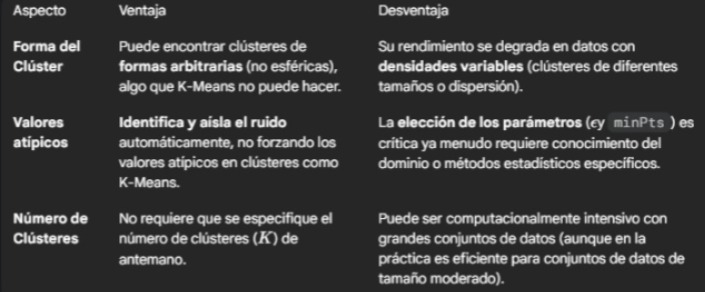

En resumen, DBSCAN es la herramienta preferida cuando sabes que tus clústeres no son redondos o cuando necesitas una forma robusta de manejar valores atípicos.

### 🐍 1. DBSCAN en Acción (Clústeres No Esféricos)

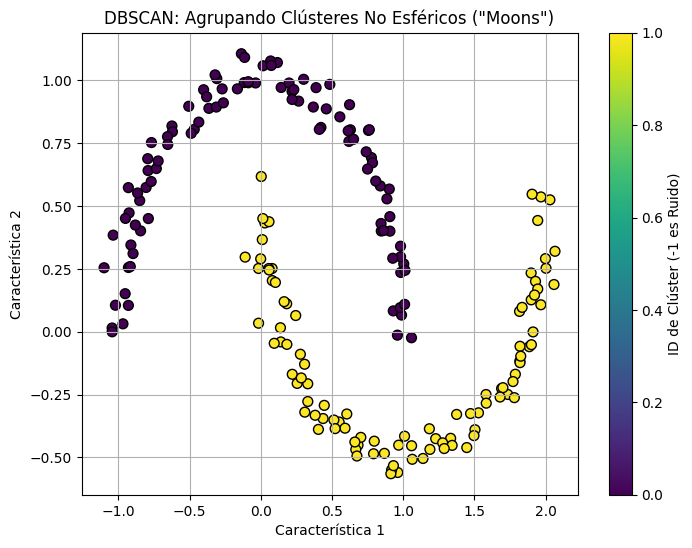

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons # Genera datos en forma de media luna

# --- 1. Generar datos de ejemplo (Moons) ---
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# --- 2. Aplicar DBSCAN ---
# Definición de parámetros:
# eps=0.3: Radio del vecindario
# min_samples=5: Mínimo de puntos para formar un núcleo denso
db = DBSCAN(eps=0.3, min_samples=5)

# Entrenar y predecir
y_dbscan = db.fit_predict(X)

# --- 3. Visualizar los resultados ---
plt.figure(figsize=(8, 6))

# Los clústeres se identifican con números (0, 1, 2, etc.)
# Los puntos etiquetados como -1 son el ruido (outliers)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50,
                      cmap='viridis', edgecolor='k')

plt.title('DBSCAN: Agrupando Clústeres No Esféricos ("Moons")')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.colorbar(scatter, label='ID de Clúster (-1 es Ruido)')
plt.grid(True)
plt.show()

### 🆚 2. Comparación Visual: DBSCAN vs. K-Means

Este código muestra la diferencia fundamental entre cómo DBSCAN y K-Means manejan datos con formas no esféricas.

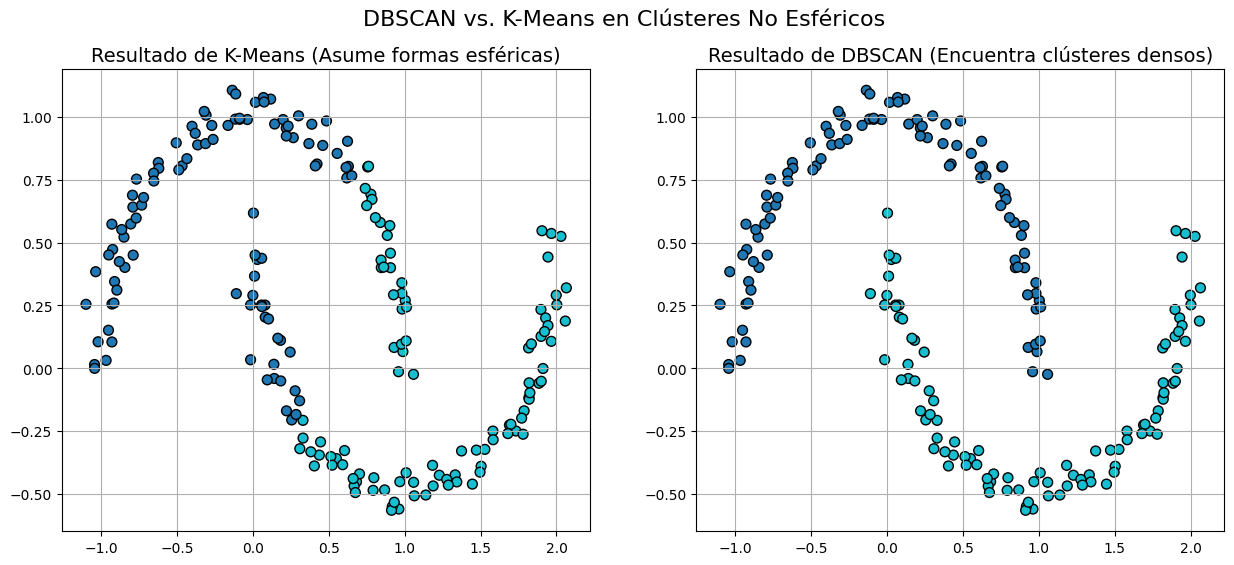

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_moons

# --- 1. Generar los datos de las "Moons" ---
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# --- 2. Modelos ---
# A. K-Means (Obliga a formar 2 clústeres esféricos)
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# B. DBSCAN (Identifica los 2 clústeres por densidad)
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# --- 3. Visualización de la Comparación ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: K-Means
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='tab10', edgecolor='k')
ax1.set_title('Resultado de K-Means (Asume formas esféricas)', fontsize=14)
ax1.grid(True)

# Subplot 2: DBSCAN
scatter_db = ax2.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='tab10', edgecolor='k')
ax2.set_title('Resultado de DBSCAN (Encuentra clústeres densos)', fontsize=14)
ax2.grid(True)

plt.suptitle('DBSCAN vs. K-Means en Clústeres No Esféricos', fontsize=16)
plt.show()

### 🚫 3. Identificación de Ruido (valores atípicos)
Este ejemplo muestra un conjunto de datos con un claro valor atípico (punto atípico) y cómo DBSCAN lo etiqueta correctamente como ruido (clúster -1 ).

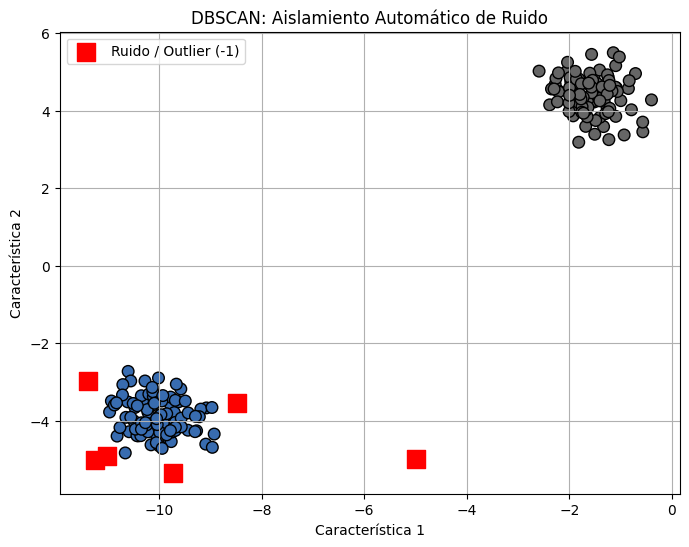

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# --- 1. Generar datos con 2 grupos y un Outlier manual ---
X, y = make_blobs(n_samples=200, centers=2, cluster_std=0.5, random_state=1)

# Añadir un outlier extremo
outlier = np.array([[-5, -5]])
X_with_outlier = np.vstack([X, outlier])

# --- 2. Aplicar DBSCAN ---
# Parámetros ajustados para encontrar los grupos y aislar el outlier
db = DBSCAN(eps=0.5, min_samples=5)
y_dbscan_outliers = db.fit_predict(X_with_outlier)

# --- 3. Visualizar los resultados ---
plt.figure(figsize=(8, 6))

scatter = plt.scatter(X_with_outlier[:, 0], X_with_outlier[:, 1],
                      c=y_dbscan_outliers, s=70,
                      cmap='Accent', edgecolor='k')

# Localizar el outlier y marcarlo
outlier_index = np.where(y_dbscan_outliers == -1)[0]
plt.scatter(X_with_outlier[outlier_index, 0], X_with_outlier[outlier_index, 1],
            marker='s', c='red', s=150, label='Ruido / Outlier (-1)')

plt.title('DBSCAN: Aislamiento Automático de Ruido')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

## III. Foco Principal: Reducción de Dimensionalidad (35 min)[texto del vínculo]

Tema 4: Modelo Factorial Lineal para Reducción de Dimensionalidad (35 min)

* Teoría y Conceptos: La Reducción de Dimensionalidad es el proceso de reducir el número de variables aleatorias consideradas, obteniendo un conjunto de variables transformadas que conservan la mayor parte de la información relevante.

#### **¿Por qué reducir?**

Ayuda a combatir la "Maldición de la Dimensionalidad" (fenómeno que hace que los algoritmos caigan con demasiadas variables) y facilita la visualización.

### Análisis de Componentes Principales (PCA)

PCA es el modelo factorial lineal más utilizado. Es una técnica de proyección que transforma el conjunto de variables originales, posiblemente correlacionadas, en un conjunto más pequeño de nuevas variables no correlacionadas llamadas Componentes Principales (PC).

* El Primer Componente Principal captura la máxima variación posible de los datos.

* El Segundo Componente Principal captura la variación máxima restante que no fue explicada por el primero, y es ortogonal (perpendicular) al primero, y así sucesivamente.

### Analogía:
 Imagina una sombra de un objeto 3D. PCA es encontrar el ángulo perfecto de la luz para que la sombra 2D (la proyección) muestre la mayor cantidad de detalles del objeto original. Está buscando la mejor perspectiva para resumir los datos.

Código de ejemplo: Implementación de PCA (Python) Usaremos el famoso dataset Iris para reducir sus 4 variables originales a solo 2 Componentes Principales y así poder visualizarlas en un plano 2D.


Varianza (Información) Explicada por el Componente 1: 0.92 (92.5%)
Varianza (Información) Explicada por el Componente 2: 0.05 (5.3%)
Varianza Total Conservada (en 2D): 0.98 (97.8%)


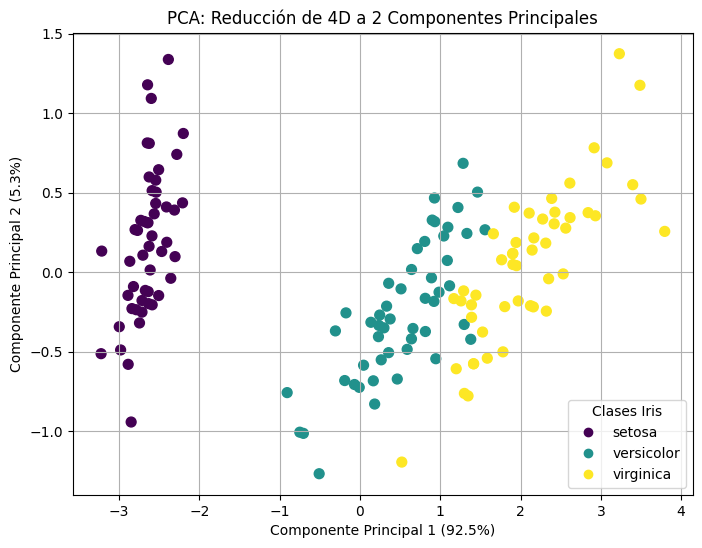

In [ ]:
# CÓDIGO 4: Análisis de Componentes Principales (PCA) (Unidad 4 - Detalle)
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cargar datos (Iris tiene 4 características: Sépalo.Longitud, Sépalo.Ancho, etc.)
iris = load_iris()
X_iris = iris.data # Características (4 dimensiones)
y_iris = iris.target # Clases de flores (solo para colorear la visualización)

# 2. Implementar PCA: Reducir de 4 dimensiones a 2
pca = PCA(n_components=2)
# Aplicamos la transformación a los datos
X_pca = pca.fit_transform(X_iris)

# 3. **Análisis de la Varianza Explicada (Es crucial):**
# ¿Cuánta información conservan los 2 componentes?
varianza_explicada = pca.explained_variance_ratio_
print(f"\nVarianza (Información) Explicada por el Componente 1: {varianza_explicada[0]:.2f} ({varianza_explicada[0]*100:.1f}%)")
print(f"Varianza (Información) Explicada por el Componente 2: {varianza_explicada[1]:.2f} ({varianza_explicada[1]*100:.1f}%)")
print(f"Varianza Total Conservada (en 2D): {varianza_explicada.sum():.2f} ({varianza_explicada.sum()*100:.1f}%)")
# Normalmente, con solo 2 componentes de 4, se conserva más del 95% de la información.

# 4. Visualizar los datos reducidos a 2D
plt.figure(figsize=(8, 6))
# Usamos el target (y_iris) para colorear y ver si PCA separó bien las clases
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_iris, cmap='viridis', s=50)
plt.title('PCA: Reducción de 4D a 2 Componentes Principales')
plt.xlabel(f'Componente Principal 1 ({varianza_explicada[0]*100:.1f}%)')
plt.ylabel(f'Componente Principal 2 ({varianza_explicada[1]*100:.1f}%)')
# Corregido: Desempaquetar los handles y labels de scatter.legend_elements() y asegurar que se pasan como listas explícitas
handles, _ = scatter.legend_elements() # No necesitamos las labels generadas por scatter.legend_elements()
plt.legend(handles=list(handles), labels=list(iris.target_names), title="Clases Iris")
plt.grid(True)
plt.show() #

## **Recapitulación:**

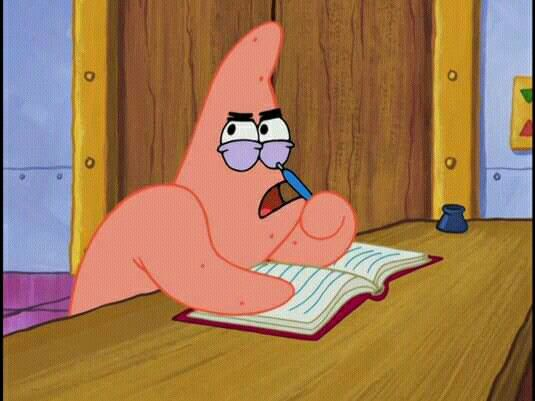

* El Aprendizaje No Supervisado se trata de descubrir estructuras, no de predecir.

* El Clustering Jerárquico (Unidad 2) construye un árbol (Dendrograma).

* K-Means (Unidad 3) requiere$k$y crea límites lineales; DBSCAN encuentra clústeres basados ​​en densidad y maneja formas complejas y ruido.

* PCA (Unidad 4) es la herramienta clave para la Reducción de Dimensionalidad y la visualización de datos de alta dimensión, maximizando la varianza explicada.